# English Premier League 2021/22 Season

The English Premier League 2021/22 season is still ongoing. With the data gotten from [football-data.co.uk](https://www.football-data.co.uk/data.php) for the season so far, can we replicate the league table and perform some analysis? We'll certainly try!

## Objective

- Create table showing the current premier league standings with the data provided. This will be acheived by using pandas and python data structures.

__Note:__ Not all teams have played the same number of matches. This we shall see in the matches played column.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('E0.csv', parse_dates=['Date'])

In [3]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset')

There are 214 rows and 106 columns in the dataset


In [4]:
df.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,2021-08-13,20:00,Brentford,Arsenal,2,0,H,1,0,...,1.62,0.50,1.75,2.05,1.81,2.13,2.05,2.17,1.80,2.09
1,E0,2021-08-14,12:30,Man United,Leeds,5,1,H,1,0,...,2.25,-1.00,2.05,1.75,2.17,1.77,2.19,1.93,2.10,1.79
2,E0,2021-08-14,15:00,Burnley,Brighton,1,2,A,1,0,...,1.62,0.25,1.79,2.15,1.81,2.14,1.82,2.19,1.79,2.12
3,E0,2021-08-14,15:00,Chelsea,Crystal Palace,3,0,H,2,0,...,1.94,-1.50,2.05,1.75,2.12,1.81,2.16,1.93,2.06,1.82
4,E0,2021-08-14,15:00,Everton,Southampton,3,1,H,0,1,...,1.67,-0.50,2.05,1.88,2.05,1.88,2.08,1.90,2.03,1.86


Let's select only the columns we need.

In [5]:
# Let us extract only the 4 columns we need for now.
df_table = (
    df[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG']]
    .rename(columns={'FTHG':'HomeGoal','FTAG':'AwayGoal'})
)

In [6]:
# Let us check for null values in the dataset
df_table.isna().sum()

HomeTeam    0
AwayTeam    0
HomeGoal    0
AwayGoal    0
dtype: int64

In [7]:
# Checking for duplicates
df_table.duplicated().sum()

0

In [8]:
df_table.head()

,HomeTeam,AwayTeam,HomeGoal,AwayGoal
0,Brentford,Arsenal,2,0
1,Man United,Leeds,5,1
2,Burnley,Brighton,1,2
3,Chelsea,Crystal Palace,3,0
4,Everton,Southampton,3,1


In [9]:
# create a list of unique teams to have played home matches
home_teams = list(set(df_table['HomeTeam']))

# create a list of unique teams to have played away matches
away_teams = list(set(df_table['AwayTeam']))

# Create a dictionary for each team and match result
home_teams_dict = {team_home: { 'win' : 0,'draw' : 0, 'lost' : 0, 'goals_scored':0, 'goals_conceded':0} for team_home in sorted(home_teams)}

# Create a dictionary for each team and match result
away_teams_dict = {team_away: { 'win' : 0,'draw' : 0, 'lost' : 0, 'goals_scored':0, 'goals_conceded':0} for team_away in sorted(away_teams)}

In [10]:
def get_result(df, col1, col2, col3, dict_):
    '''
    df : dataframe,
    col1 : goals scored by home team,
    col2 : goals scored by away team,
    col3 : team,
    dict_ : dictionary containing each team with no results,
    returns dict_ containing teams results
    '''
    for i in range(len(df)):
        for key,value in dict_.items():
            if df[col3][i] == key : 
                # if home team won
                if (df[col1][i] > df[col2][i]): 
                    value['win'] += 1
                    value['goals_scored'] += df[col1][i]
                    value['goals_conceded'] += df[col2][i]
                # if home team lost
                elif (df[col1][i] < df[col2][i]): 
                    value['lost'] += 1
                    value['goals_scored'] += df[col1][i]
                    value['goals_conceded'] += df[col2][i]
                # if home team drew
                elif (df[col1][i] == df[col2][i]):
                    value['draw'] += 1
                    value['goals_scored'] += df[col1][i]
                    value['goals_conceded'] += df[col2][i]
    return dict_

In [11]:
# store all home teams results in a dictionary
home_table_dict = get_result(df_table, 'HomeGoal', 'AwayGoal', 'HomeTeam', home_teams_dict)

# store all away teams results in a dictionary
away_table_dict = get_result(df_table, 'AwayGoal', 'HomeGoal', 'AwayTeam', away_teams_dict)

In [12]:
# Create an empty dataframe with the following columns for home teams
df_home = pd.DataFrame(columns = ['HomeTeam','Wins','Draws','Losses','GoalsFor','GoalsAgainst'])

# Create an empty dataframe with the following columns for away teams
df_away = pd.DataFrame(columns = ['AwayTeam','Wins','Draws','Losses','GoalsFor','GoalsAgainst'])

In [13]:
home_list = [(k,v) for k,v in home_table_dict.items()]
away_list = [(k,v) for k,v in away_table_dict.items()]

In [14]:
def create_table(df, col1, table_dict, team_list):
    '''
    df : empty dataframe,
    col1 : team,
    table_dict : dictionary containing teams results, 
    team_list : list of all unique teams,
    returns df with results for each team
    '''
    # Create an empty dataframe with the following columns
    df = pd.DataFrame(columns = [col1,'Wins','Draws','Losses','GoalsFor','GoalsAgainst'])

    team_list = [(k,v) for k,v in table_dict.items()]

    for i,team in enumerate(team_list):
        df.loc[i] = [team[0], team[1]['win'], team[1]['draw'], team[1]['lost'], team[1]['goals_scored'], team[1]['goals_conceded']]
    df = (
        df
        .sort_values(by=['Wins','Draws','Losses'], ascending=False)
        .reset_index()
        .drop('index', axis=1)
        .assign(GoalDifference = lambda x : x['GoalsFor'] - x ['GoalsAgainst'])
        .assign(Points = lambda x : (x['Wins']*3) + (x ['Draws']* 1) + (x ['Losses']* 0))
        .assign(MatchesPlayed = lambda x : x['Wins'] + x ['Draws'] + x ['Losses'])
        .assign(WinPercentage = lambda x : (x['Wins'] * 100) / x['MatchesPlayed'])
        .assign(WinPercentage = lambda x : [round(x,1) for x in x.WinPercentage])
    )
    num_cols = ['Wins', 'Draws', 'Losses', 'GoalsFor', 'GoalsAgainst','GoalDifference', 'Points', 'MatchesPlayed']
    df[num_cols] = df[num_cols].astype(int)
    return df

## Home Table

In [16]:
df_home = create_table(df_home, 'HomeTeam', home_table_dict, home_list)
df_home

,HomeTeam,Wins,Draws,Losses,GoalsFor,GoalsAgainst,GoalDifference,Points,MatchesPlayed,WinPercentage
0,Man City,9,1,1,32,6,26,28,11,81.8
1,Liverpool,7,3,0,25,6,19,24,10,70.0
2,Arsenal,7,2,2,18,8,10,23,11,63.6
3,Tottenham,7,1,2,16,10,6,22,10,70.0
4,Chelsea,6,5,1,27,10,17,23,12,50.0
5,Man United,6,1,4,18,15,3,19,11,54.5
6,Leicester,5,2,4,19,16,3,17,11,45.5
7,West Ham,5,2,4,22,18,4,17,11,45.5
8,Crystal Palace,4,5,3,21,15,6,17,12,33.3
9,Aston Villa,4,2,4,17,16,1,14,10,40.0


## Away Table

In [17]:
df_away = create_table(df_away, 'AwayTeam', away_table_dict, away_list)
df_away

,AwayTeam,Wins,Draws,Losses,GoalsFor,GoalsAgainst,GoalDifference,Points,MatchesPlayed,WinPercentage
0,Man City,9,2,1,23,8,15,29,12,75.0
1,Chelsea,7,3,2,21,8,13,24,12,58.3
2,Liverpool,7,3,2,33,13,20,24,12,58.3
3,West Ham,6,2,4,19,13,6,20,12,50.0
4,Wolves,6,2,3,11,8,3,20,11,54.5
5,Man United,5,4,2,18,15,3,19,11,45.5
6,Tottenham,4,2,4,10,14,-4,14,10,40.0
7,Arsenal,4,1,5,15,17,-2,13,10,40.0
8,Aston Villa,4,0,7,11,16,-5,12,11,36.4
9,Brighton,3,7,1,13,12,1,16,11,27.3


## Overall Table

In [18]:
# combine home_table_dict & away_table_dict
merged_dict = {}

for key in home_table_dict:
    if key in away_table_dict:
        new_value = {'win': home_table_dict[key]['win'] + away_table_dict[key]['win'],
                     'draw': home_table_dict[key]['draw'] + away_table_dict[key]['draw'],
                     'lost': home_table_dict[key]['lost'] + away_table_dict[key]['lost'],
                     'goals_scored': home_table_dict[key]['goals_scored'] + away_table_dict[key]['goals_scored'],
                     'goals_conceded': home_table_dict[key]['goals_conceded'] + away_table_dict[key]['goals_conceded'],
                    }
        merged_dict[key] = new_value

In [19]:
# Create an empty dataframe with the following columns for all teams
overall_standings = pd.DataFrame(columns = ['Teams','Wins','Draws','Losses','GoalsFor','GoalsAgainst'])

team_list = [(k,v) for k,v in merged_dict.items()]
overall_standings = create_table(overall_standings, 'Teams', merged_dict, team_list)

In [20]:
overall_standings

,Teams,Wins,Draws,Losses,GoalsFor,GoalsAgainst,GoalDifference,Points,MatchesPlayed,WinPercentage
0,Man City,18,3,2,55,14,41,57,23,78.3
1,Liverpool,14,6,2,58,19,39,48,22,63.6
2,Chelsea,13,8,3,48,18,30,47,24,54.2
3,Man United,11,5,6,36,30,6,38,22,50.0
4,West Ham,11,4,8,41,31,10,37,23,47.8
5,Arsenal,11,3,7,33,25,8,36,21,52.4
6,Tottenham,11,3,6,26,24,2,36,20,55.0
7,Wolves,10,4,7,19,16,3,34,21,47.6
8,Aston Villa,8,2,11,28,32,-4,26,21,38.1
9,Leicester,7,5,8,34,37,-3,26,20,35.0


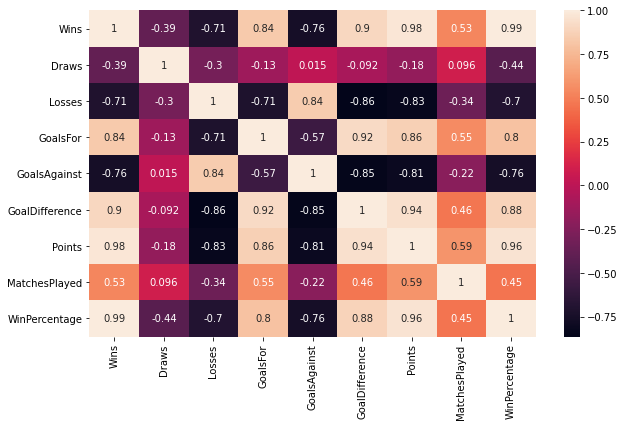

In [21]:
plt.rcParams['figure.figsize'] = (10,6)
ax = sns.heatmap(data=overall_standings.corr(), annot=True)
plt.show()

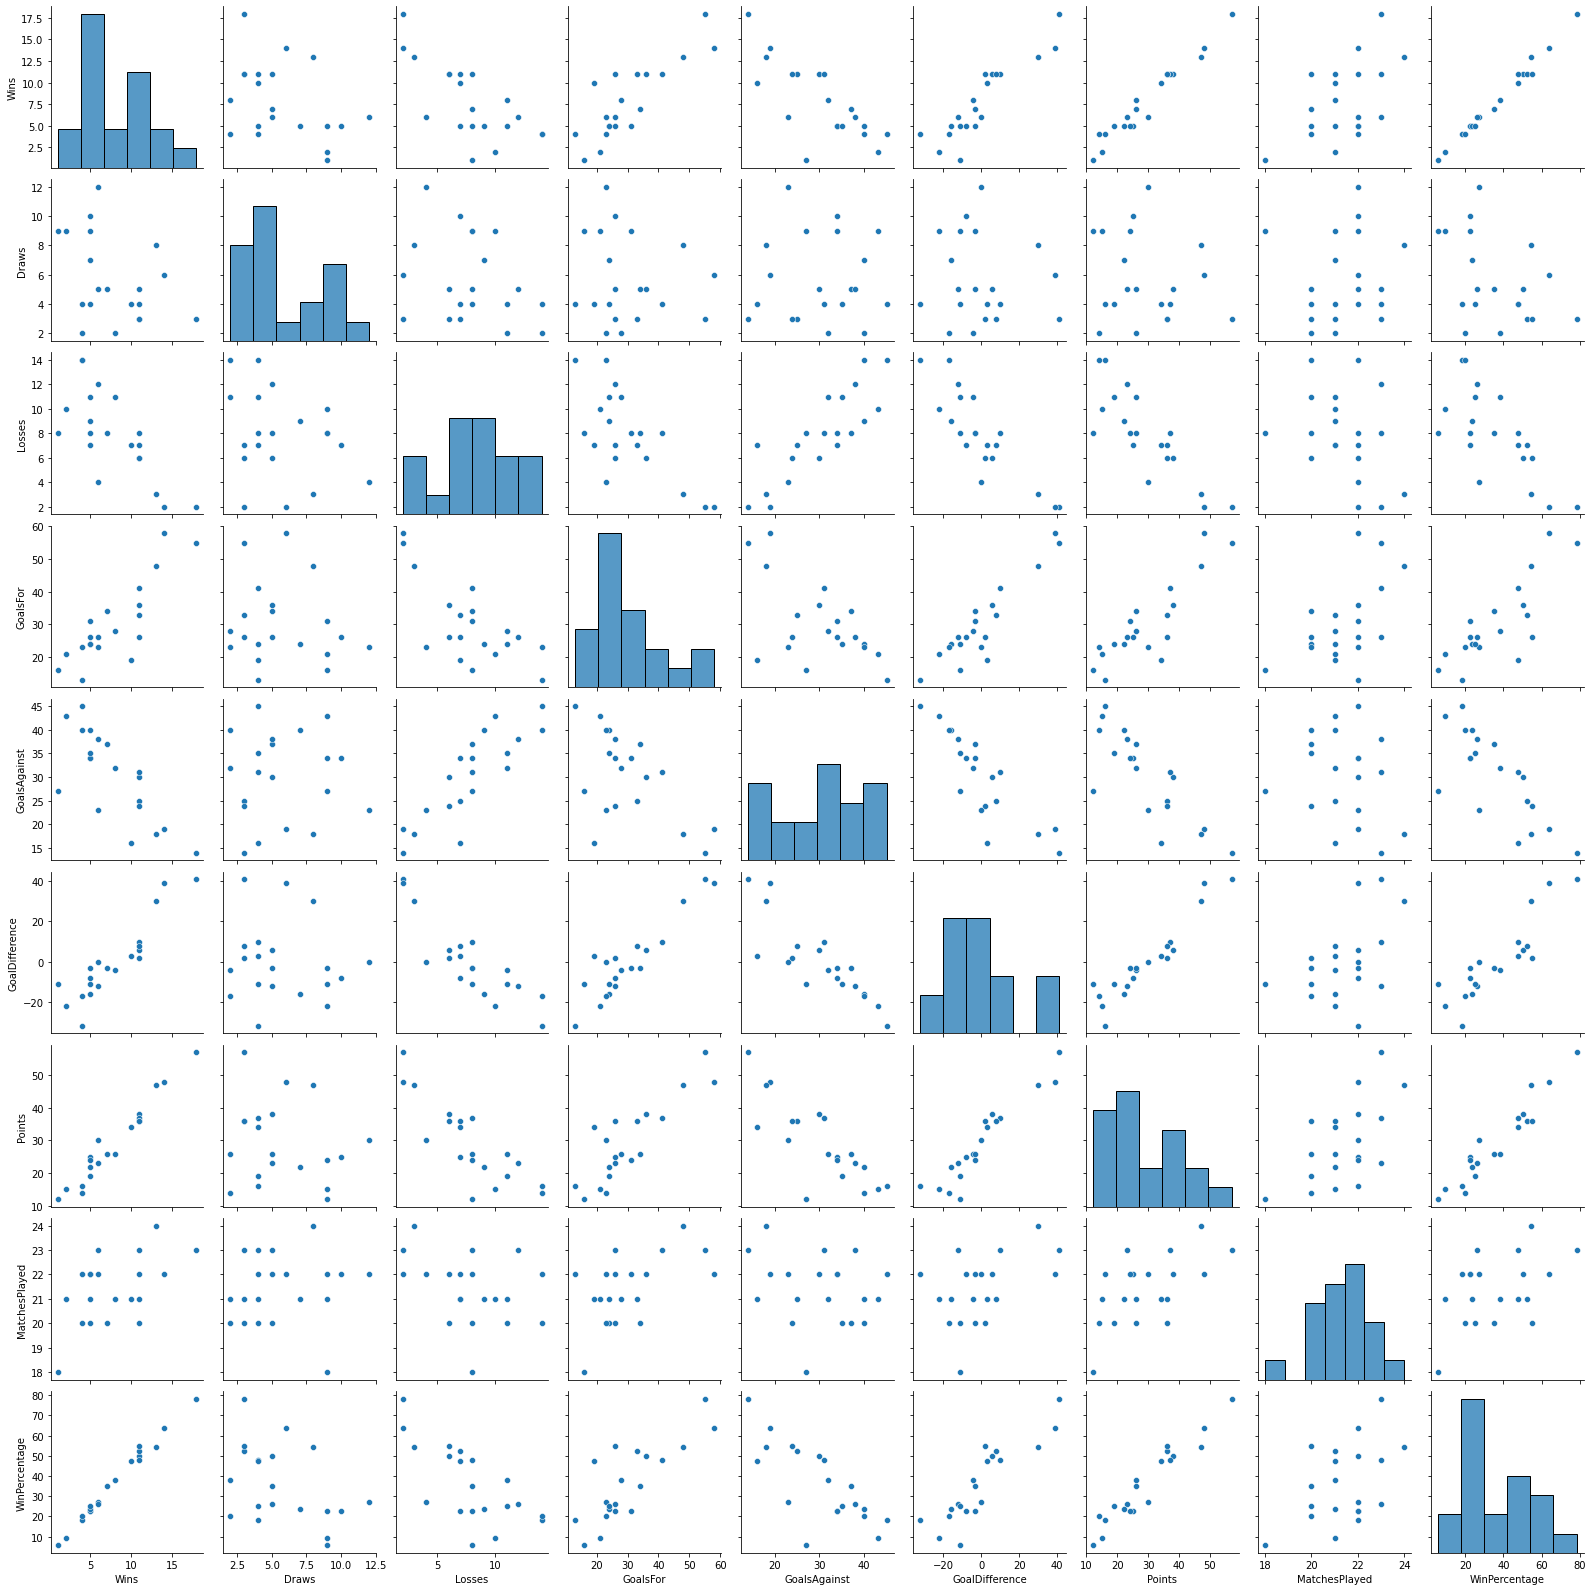

In [22]:
num_cols = []
for col in overall_standings.columns:
    if overall_standings[col].dtype != object:
        num_cols.append(col)
        
ax = sns.pairplot(data = overall_standings[num_cols])
plt.show()